# Confusion Matrices

An exploration of displaying confusion matrices by the size of a shape in each space.

TODO: try circles
   Use more real examples.

First, lets build a crappy model to visualize something.

In [1]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
data = load_digits()
X = data.data
y = data.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.98)

We're using a large test_set size and a decision tree because we want bad results, since this is just about the graphics.

In [4]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [5]:
model.score(X_test, y_test)

0.3717366628830874

Great! (or rather, really bad)

This is a function to display confusion matrices by the size of a square in a grid. Note the 

In [7]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(ax,
                          y_true,
                          y_pred,
                          grid=False,
                          area=True,
                          normalization="maximum"):
    """
    Parameters
    ----------
    ax : matplotlib axis on which to draw graph.
    y_true : list-like object
        actual labels.
    y_pred : list-like object of the same size as y_true
        predictions based on model.
    grid : bool, default False
        whether to draw a grid.
    area : bool, default: True
        if True, the area of the square is proportional to the value. If False, the length
        of a side is used.
    nornalization : string, default: 'maximum'
        How to normalize the values.
        'maximum' : normalize all values so the largest value is 1.
        'prediction' or 'precision' : normalize by columns so that the sum of each prediction is 1,
            so the values represent the precisions
        'true' or 'recall': normalize by rows so that the sum of each true value is 1,
            so the values represent the recalls
    """
    cm = confusion_matrix(y_true, y_pred).astype(float).transpose()
    if normalization == 'maximum':
        cm /= cm.max()
    elif normalization == 'prediction' or normalization == 'precision':
        cm /= cm.sum(axis=1, keepdims=True)
    elif normalization == 'true' or normalization == 'recall':
        cm /= cm.sum(axis=0, keepdims=True)
    else:
        raise ValueError("`normalization` should be one of `all`, `true`, or `predictions`")
    n = cm.shape[0]
    
    labels = np.unique(y_true)
    tics = np.arange(n+1)
    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_ticks(tics + 0.5, minor=True)
        axis.set(ticks=tics, ticklabels=labels)
    ax.tick_params(axis='both', which='major', length=0)

    ax.set_xlim(-0.5, n-0.5)
    ax.set_ylim(-0.5, n-0.5)

    ax.invert_yaxis()
    ax.grid(grid, which='minor')
    
    ax.set_xlabel('prediction')
    ax.set_ylabel('true')

    if area:
        cm **= 0.5
    for i in range(n):
        for j in range(n):
            size = cm[i, j]
            square = matplotlib.patches.Rectangle((i - size/2, j - size/2), size, size)
            ax.add_patch(square)

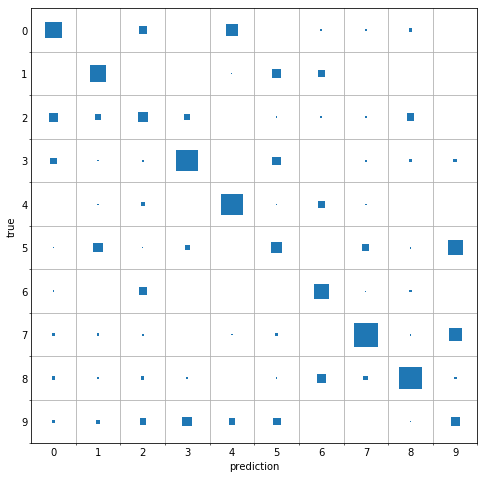

In [8]:
fig, ax = plt.subplots(figsize=(8,8))
plot_confusion_matrix(ax, y_test, model.predict(X_test), area=False, grid=True, normalization='precision') 


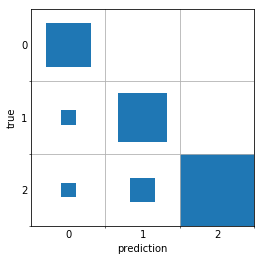

In [9]:
fig, ax = plt.subplots(figsize=(4, 4))
plot_confusion_matrix(ax, [0,0,0,1,1,1,2,2,2], [0,0,0,1,1,0,2,1,0], area=False, grid=True, normalization='precision') 
